## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import sqlite3

#Let's open the csv file for movie gross earnings
df = pd.read_csv("bom.movie_gross.csv")

In [2]:
#Let's look at a few pieces of information
#Let's start by finding the highest domestic grossing movie
max_dom_gross = df['domestic_gross'].max()
print(df.loc[df['domestic_gross'] == max_dom_gross])

                             title studio  domestic_gross foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0       1,131.6  2015


In [3]:
#Correcting the foreign gross amount to be accurate

df.loc[1872, 'foreign_gross'] = 1131561399
df.loc[1873, 'foreign_gross'] = 1018130012
df.loc[3079, 'foreign_gross'] = 1369544272
df.loc[1874, 'foreign_gross'] = 1162040651
df.loc[2760, 'foreign_gross'] =  1009996733

In [57]:
#Let's find the top grossing movies that made at least 400000000 in the domestic box office.

df_range = df.loc[(df['domestic_gross'] > 400000000.0) & (df['domestic_gross'] <= 936700000.0)]
df_range.sort_values(by = ['domestic_gross'], ascending = False).head(50)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131561399,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018
1873,Jurassic World,Uni.,652300000.0,1018130012,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [5]:
#let's look at the highest foreign grossing movie.
# But before that, we need to manipulate some data
#Let's look at the data types for the DF
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#Under foreign_gross, it appears that there are some null values, and that the type of the column is string.
#We need to remove null values, and convert to integer to find the highest foreign grossing movie.

df.dropna(subset = ['foreign_gross'], inplace = True)
df['foreign_gross'] = df['foreign_gross'].astype(str).astype(int)

In [7]:
#Finding highest foreign grossing movie
max_for_gross = df['foreign_gross'].max()
print(df.loc[df['foreign_gross'] == max_for_gross])

                       title studio  domestic_gross  foreign_gross  year
3079  Avengers: Infinity War     BV     678800000.0     1369544272  2018


In [58]:
#Let's find the top grossing movies that made at least 400000000 in the foreign box office

df_for_range = df.loc[(df['foreign_gross'] > 400000000.0 ) & (df['foreign_gross'] <= 1369544272)]
df_for_range.sort_values(by = ['foreign_gross'], ascending = False).head(21)

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018
1874,Furious 7,Uni.,353000000.0,1162040651,2015
1872,Star Wars: The Force Awakens,BV,936700000.0,1131561399,2015
1873,Jurassic World,Uni.,652300000.0,1018130012,2015
2760,The Fate of the Furious,Uni.,226000000.0,1009996733,2017
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013


A theory I had was that sequels and movies based on nostalgia would do especially well in the box office, which seems to be supported in both domestic and foreign box offices. When you look at top grossing movies you see a lot of 2's, 3's, 7's, etc next to the movie titles, as well as movies that build on preexisting older series like Jurassic Park or James Bond. This is also strongly supported when you look at the top domestic grossing movie and the top foreign grossing movie between the years of 2010 and 2018. The top domestic grossing movie was "Star Wars: The Force Awakens" and the top foreign grossing movie was "Avengers: Infinity War". Both are sequels and build on a preexisting series, but that will be talked about more in the presentation.

Next, let's look at the production budget of several movies.

In [59]:
df_budget = pd.read_csv('tn.movie_budgets.csv')

#First let's do some cleanup
#Let's get rid of the dollar signs and commas in the column values
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',','')


#Now let's convert the strings to ints
df_budget['production_budget'] = df_budget['production_budget'].astype(str).astype('int')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype(str).astype('int')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str).astype('int64')

df_budget.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [9]:
#Let's find the highest production budget movie

max_budget = df_budget['production_budget'].max()
print(df_budget.loc[df_budget['production_budget'] == max_budget])

   id  release_date   movie  production_budget  domestic_gross  \
0   1  Dec 18, 2009  Avatar          425000000       760507625   

   worldwide_gross  
0       2776345279  


It looks like the highest production budget goes to Avatar, which is also currently the highest grossing movie of all time. Let's see if there's a correlation between production budget and how much a movie grosses.

The correlation coefficient between Production budget and domestic box office is: 0.6856818396752733
The correlation coefficient between Production budget and worldwide box office is: 0.7483059765694753


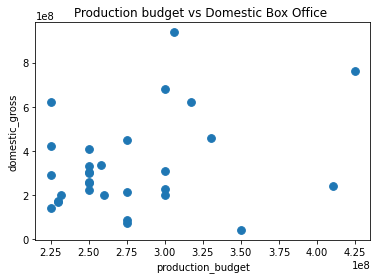

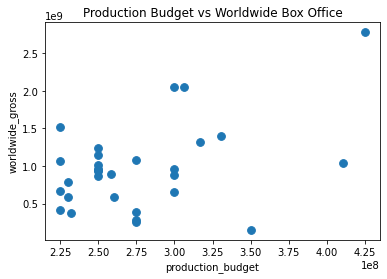

In [10]:
#Let's create a scatterplot and find the correlation coeffient


#Let's look at production budget and domestic gross
ax1 = df_budget.head(30).plot('production_budget', 'domestic_gross', s = 60,  kind = 'scatter');
ax1.set_title('Production budget vs Domestic Box Office ')
dom_corr = df_budget['production_budget'].corr(df_budget['domestic_gross'])
print("The correlation coefficient between Production budget and domestic box office is:", dom_corr)

#Now let's look at production budget and worldwide gross
ax2 = df_budget.head(30).plot('production_budget', 'worldwide_gross', s = 60, kind = 'scatter')
ax2.set_title("Production Budget vs Worldwide Box Office")
world_corr = df_budget['production_budget'].corr(df_budget['worldwide_gross'])
print("The correlation coefficient between Production budget and worldwide box office is:", world_corr)


The graph and the correlation coefficient suggest a strong relationship between production budget and both domestic box office and worldwide box office gross earnings.

In [36]:
conn = sqlite3.connect("im.db")

movies_df = pd.read_sql("""
        SELECT primary_title, original_title, start_year, genres, averagerating, numvotes,primary_name 
        FROM movie_basics
        JOIN movie_ratings
        USING(movie_id)
        JOIN directors
        USING(movie_id)
        JOIN persons
        USING(person_id)
        ORDER BY numvotes DESC;
        """,conn
)

movies_df.rename(columns = {'primary_name':'Director'}, inplace = True)
movies_df.drop_duplicates().reset_index(drop = True).head(50)





,primary_title,original_title,start_year,genres,averagerating,numvotes,Director
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,Christopher Nolan
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,Christopher Nolan
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,Christopher Nolan
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,Quentin Tarantino
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,Joss Whedon
5,The Wolf of Wall Street,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358,Martin Scorsese
6,Shutter Island,Shutter Island,2010,"Mystery,Thriller",8.1,1005960,Martin Scorsese
7,Guardians of the Galaxy,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394,James Gunn
8,Deadpool,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847,Tim Miller
9,The Hunger Games,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227,Gary Ross


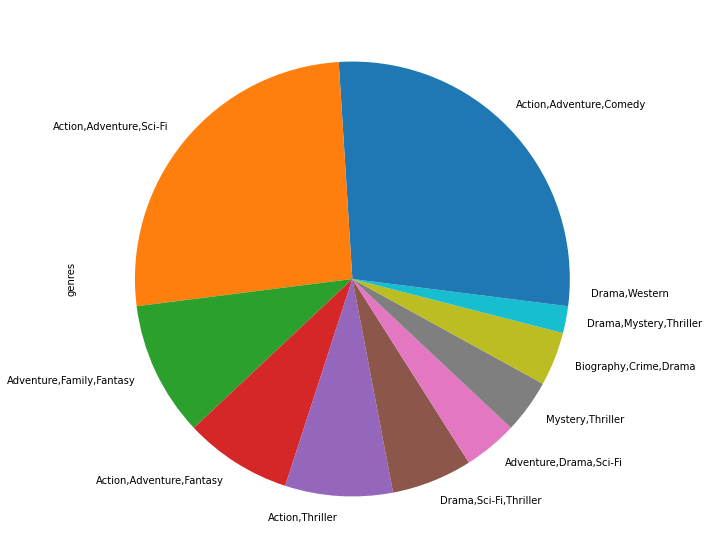

In [50]:
movies_df['genres'].head(50).value_counts().plot.pie(figsize = (10,10));